In [1]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import SmallWorld
from viz import draw_data
from utils import Timer, partition
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>

In [2]:
n = 3000 # number of vertices
k = 3
beta = .5
T = 10000
TAIL = T // 2
I = 10
alphas = [.10]
bs = partition(0, 12, 128)

In [3]:
def calc(alphas, bs, graphs, T, pool_size=32):
    pool = Pool(pool_size)
    res = []
    timer = Timer()
    for graph in graphs:
        local_timer = Timer()
        res.append(pool.map(fun, [(graph, b, alpha, T) for b in bs for alpha in alphas]))
        print(f'passed in {local_timer.measure()}', flush=True)
    timer.print_elapsed()
    return np.array(res)

In [4]:
def plot_mean_and_std(data, last):
    fig, axs = plt.subplots(2)
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[0].plot(bs, cur, '.-')
    
    cur = np.apply_along_axis(lambda x: np.std(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[1].plot(bs, cur, '.-')

In [5]:
def plot_means(bs, data, last):
    fig, ax = plt.subplots()
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    for t in cur:
        ax.scatter(bs, t, s=1, alpha=.05, c='red')
        
    cur = np.apply_along_axis(np.mean, 0, cur)
    ax.plot(bs, cur, '-')
    plt.show()

In [27]:
graphs = [SmallWorld(n, k, beta) for _ in range(I)]

In [28]:
res = calc(alphas, bs, graphs, T)

passed in 2951.969690322876
passed in 3020.259202480316
passed in 2994.3034160137177
passed in 2928.923668861389
passed in 2929.584634065628
passed in 3028.6456100940704
passed in 3182.971205472946
passed in 3075.654721021652
passed in 3036.4059915542603
passed in 2940.6984584331512
time elapsed = 30089.43106174469


In [34]:
res.shape

(10, 128, 10000)

<IPython.core.display.Javascript object>


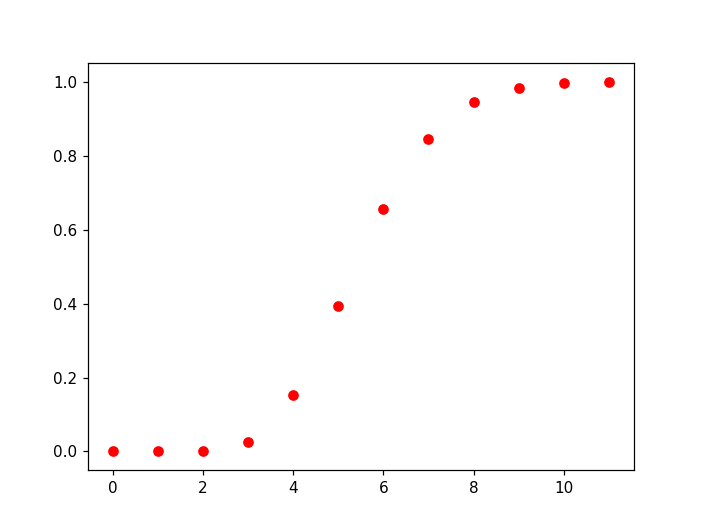

In [42]:
plot_avg_deg_distribuion(graphs, 12)

<IPython.core.display.Javascript object>


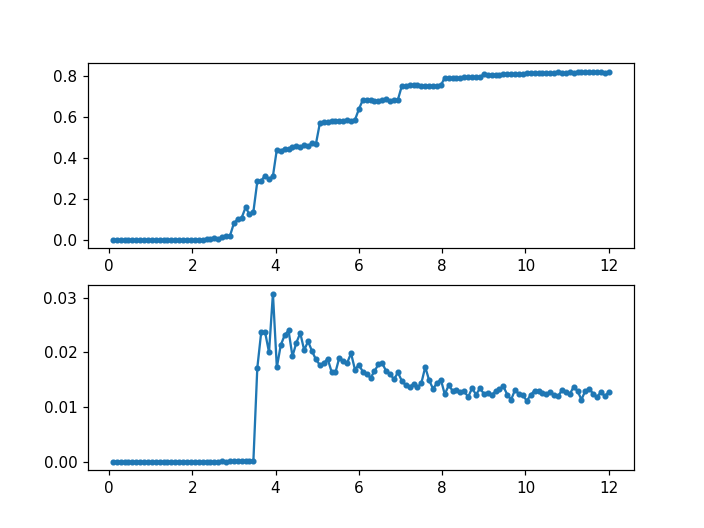

In [39]:
plot_mean_and_std(res, 50)

In [37]:
def plot_avg_deg_distribuion(graphs, max_deg=20):
    s = [0] * max_deg
    for graph in graphs:
        for d, cnt in graph.degrees().items():
            if d < max_deg:
                s[d] += cnt
    s = np.array(s)
    s = s / sum(s)
    for i in range(1, len(s)):
        s[i] += s[i - 1]
    plt.scatter(np.arange(len(s)), s, c='red')

<IPython.core.display.Javascript object>


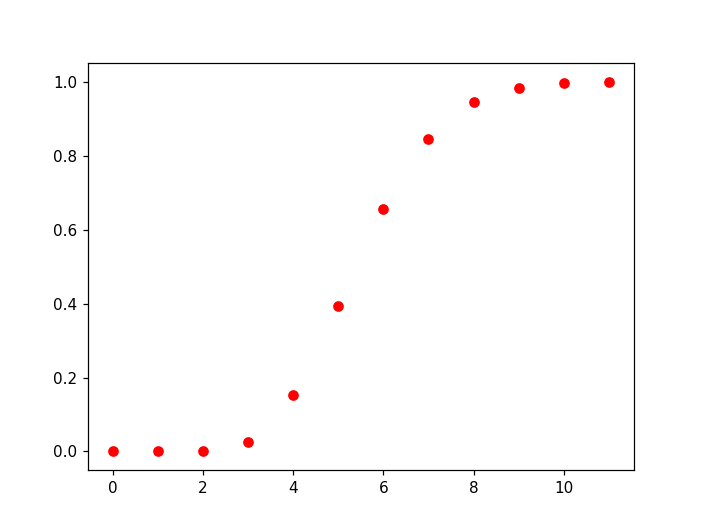

In [41]:
plot_avg_deg_distribuion(graphs, 12)

In [14]:
graphs = [SmallWorld(500, 5, .7) for _ in range(100)]

In [15]:
res57 = calc(alphas, partition(0, 16, 128), graphs, 1000)

passed in 55.97434043884277
passed in 56.406524896621704
passed in 54.62553596496582
passed in 55.60226798057556
passed in 55.93197798728943
passed in 54.624871492385864
passed in 56.04110598564148
passed in 54.89000368118286
passed in 54.36610388755798
passed in 54.64613056182861
passed in 56.38739466667175
passed in 55.72661280632019
passed in 55.02812743186951
passed in 55.59827184677124
passed in 57.376033544540405
passed in 57.062960624694824
passed in 56.830418825149536
passed in 56.564863204956055
passed in 56.173521757125854
passed in 55.45390582084656
passed in 55.5908145904541
passed in 55.37958765029907
passed in 55.21985840797424
passed in 54.79242563247681
passed in 55.54910135269165
passed in 55.24055242538452
passed in 55.74003601074219
passed in 56.54106426239014
passed in 55.75250577926636
passed in 55.73632001876831
passed in 55.11621689796448
passed in 55.90636444091797
passed in 56.38871622085571
passed in 55.108752727508545
passed in 56.95060467720032
passed in 56.

<IPython.core.display.Javascript object>


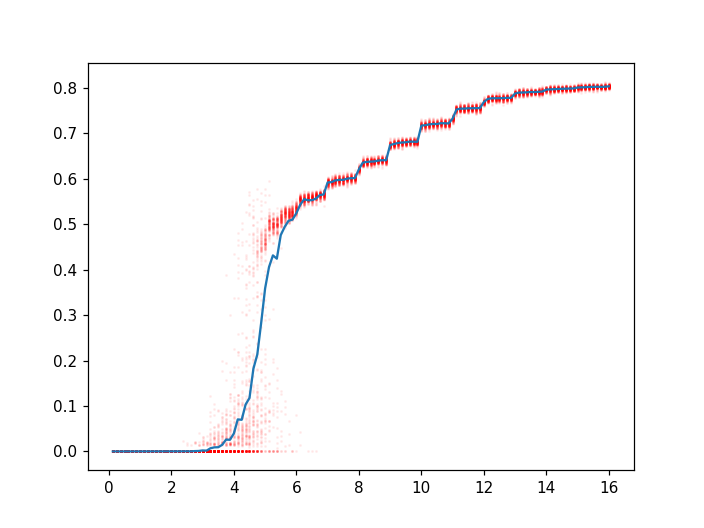

In [18]:
plot_means(partition(0, 16, 128), res57, 500)